# Chapter 1: The Behavioral Data Analysis difference

## Confound it! The hidden dangers of letting regression sort it out

### Data and libraries

In [2]:
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

### Why correlation is not causation: a confounder in action

In [3]:
#Reading the data
stand_data_df = pd.read_csv('chap1-stand_data.csv')

<AxesSubplot:xlabel='temps', ylabel='icecream_sales'>

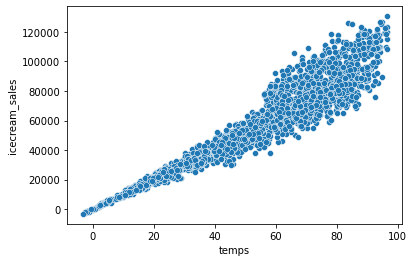

In [4]:
#Plotting ice-cream sales against temperatures
sns.scatterplot(x='temps', y='icecream_sales', data=stand_data_df)

In [5]:
#Running linear regressions 
#Biased model (coeff is 1,145 but should be 1,000)
print(ols("icecream_sales ~ temps", data=stand_data_df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:         icecream_sales   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 2.142e+04
Date:                Sat, 03 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:56:22   Log-Likelihood:                -25180.
No. Observations:                2400   AIC:                         5.036e+04
Df Residuals:                    2398   BIC:                         5.037e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4519.0554    454.566     -9.941      0.0

In [6]:
#correct model (coeffs are 1,000 and 20,000)
print(ols("icecream_sales ~ temps + summer_months", data=stand_data_df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:         icecream_sales   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                 2.647e+04
Date:                Sat, 03 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:56:37   Log-Likelihood:                -24167.
No. Observations:                2400   AIC:                         4.834e+04
Df Residuals:                    2397   BIC:                         4.836e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        21.8783    308.914      0.071

In [7]:
#Model biased by extra controlling
print(ols("icecream_sales ~ temps + summer_months + iced_coffee_sales", 
          data=stand_data_df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:         icecream_sales   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                 1.765e+04
Date:                Sat, 03 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:56:49   Log-Likelihood:                -24167.
No. Observations:                2400   AIC:                         4.834e+04
Df Residuals:                    2396   BIC:                         4.836e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            24.5560    308.87

In [ ]:
##### Second example: survey data #####

#Reading the data
survey_data_df = pd.read_csv('chap1-survey_data.csv')

#Reformatting shopped variable to binary
survey_data_df['shopped'] = pd.Categorical(survey_data_df.shopped, 
                                      categories=[0,1], 
                                      ordered = True)

In [ ]:
### Plotting relationships between variables in the data

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
#Scatterplot of chocolate versus vanilla taste 
ax1.set_xlim(0,28)
ax1.set_ylim(0,28)
ax1.set_xlabel('Taste for vanilla')
ax1.set_ylabel('Taste for chocolate')
sns.regplot(x='vanilla', y='chocolate', data=survey_data_df, 
            line_kws={'color':'black'}, ax=ax1)
#Boxplot of vanilla taste against shopping behavior
ax2.set_xlabel('Shopped (Y/N)')
ax2.set_ylabel('Taste for vanilla')
sns.boxplot(x='shopped', y='vanilla', data=survey_data_df, ax=ax2)
#Boxplot of chocolate taste against shopping behavior
ax3.set_xlabel('Shopped (Y/N)')
ax3.set_ylabel('Taste for chocolate')
sns.boxplot(x='shopped', y='chocolate', data=survey_data_df, ax=ax3)

fig.tight_layout()
plt.show()

In [ ]:
### Plotting same scatterplot but for shoppers only

#Scatterplot of chocolate versus vanilla taste 
sns.regplot(x='vanilla', y='chocolate', 
            data=survey_data_df[survey_data_df.shopped==1], 
            line_kws={'color':'black'})